# $f(x) = 3x - cos(x+1)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numerical_methods import *

%matplotlib inline

In [3]:
start = 2
end = 5
deg = 4

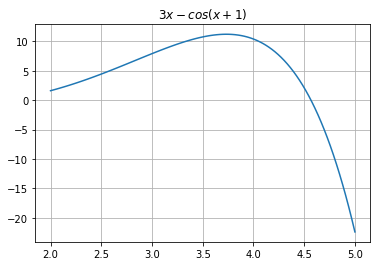

In [5]:
f = lambda x: 3*x - np.cos(x+1)
f = lambda x: x**3 - np.exp(x) + 1
fig, ax = plt.subplots()
ax.grid()
ax.set_title('$3x-cos(x+1)$')
x = np.linspace(start, end, 100)
plt.plot(x, f(x))
plt.show()

In [45]:
base = [lambda x: x* 0 + 1,
        lambda x: x,
        lambda x: x**2,
        lambda x: x**3
       ]

In [46]:
def points(start, end, n , f, base):
    xs = np.linspace(start, end, n)
    fs = list(f(xs))
    Q = []
    for func in base:
        Q.append(list(func(xs)))
    xs = list(xs)
    return xs, fs, Q

In [47]:
def MSE(Q, fs):
    Q = Array(Q).T()
    y = Array([fs]).T()
    H = Q.T() @ Q
    b = Q.T() @ y
    return gauss(H, b.T()).array, Q, y, H, b

In [48]:
xs, fs, Q = points(start, end, 6, f, base)
res, Q, y, H, b = MSE(Q, fs)

In [49]:
xs

[-1.0,
 -0.6,
 -0.19999999999999996,
 0.20000000000000018,
 0.6000000000000001,
 1.0]

In [56]:
fs

[0.8414709848078965,
 0.12196277425332762,
 0.0015893546463604882,
 0.0015893546463604951,
 0.12196277425332773,
 0.8414709848078965]

In [57]:
Q.array.T

array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ],
       [-1.   , -0.6  , -0.2  ,  0.2  ,  0.6  ,  1.   ],
       [ 1.   ,  0.36 ,  0.04 ,  0.04 ,  0.36 ,  1.   ],
       [-1.   , -0.216, -0.008,  0.008,  0.216,  1.   ]])

In [51]:
y.array

array([[0.84147098],
       [0.12196277],
       [0.00158935],
       [0.00158935],
       [0.12196277],
       [0.84147098]])

In [52]:
H.array

array([[6.00000000e+00, 2.22044605e-16, 2.80000000e+00, 1.11022302e-16],
       [2.22044605e-16, 2.80000000e+00, 1.11022302e-16, 2.26240000e+00],
       [2.80000000e+00, 1.11022302e-16, 2.26240000e+00, 0.00000000e+00],
       [1.11022302e-16, 2.26240000e+00, 0.00000000e+00, 2.09344000e+00]])

In [53]:
b.array

array([[1.93004623],
       [0.        ],
       [1.77088232],
       [0.        ]])

In [54]:
res

array([[-1.03225080e-01],
       [-2.55068967e-16],
       [ 9.10498824e-01],
       [ 2.81129775e-16]])

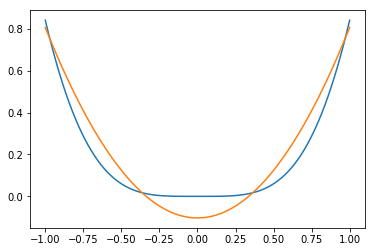

In [55]:
f = lambda x: 3*x - np.cos(x+1)
f = lambda x: x**3 * np.sin(x)
app = lambda x: sum([res[i][0]*base[i](x) for i in range(deg)])
fig = plt.subplots()
x = np.linspace(start, end, 100)
plt.plot(x, f(x))
plt.plot(x, app(x))
plt.show()

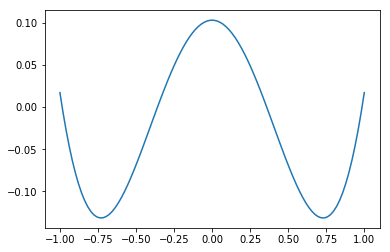

In [11]:
f = lambda x: 3*x - np.cos(x+1)
f = lambda x: x**3 * np.sin(x)
app = lambda x: sum([res[i][0]*base[i](x) for i in range(deg)])
fig = plt.subplots()
x = np.linspace(start, end, 100)
plt.plot(x, f(x)-app(x))
plt.show()

## Полиномы Лежандра

In [12]:
from sympy import *

In [13]:
x = Symbol('x')
f = 3*x - cos(x+1)
f = (x**3) * sin(x)
deg = 4

In [14]:
def legendre(f):
    base = []
    for i in range(deg):
        base.append(1/(factorial(i)*2**i)* diff((1-x**2)**i, x, i))
    res = [float(integrate(f*i, (x, start, end))/ integrate(i**2, (x, start, end))) for i in base]
    base_n = [lambda x: x*0 +1]
    for i in range(1, deg):
        base_n.append(lambdify(x, base[i]))
    return res, base_n

In [15]:
res, base = legendre(f)

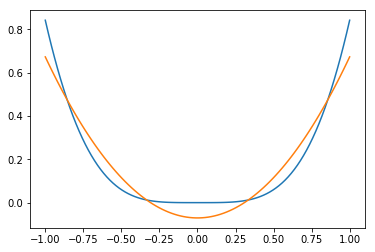

In [16]:
app = lambda x: sum([res[i]*base[i](x) for i in range(deg)])
fig = plt.subplots()
x = np.linspace(start, end, 100)
f = lambda x: 3*x - np.cos(x+1)
f = lambda x: (x**3)*np.sin(x)
plt.plot(x, f(x))
plt.plot(x, app(x))
plt.show()

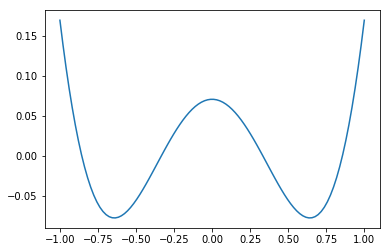

In [17]:
app = lambda x: sum([res[i]*base[i](x) for i in range(deg)])
fig = plt.subplots()
x = np.linspace(start, end, 100)
f = lambda x: 3*x - np.cos(x+1)
f = lambda x: x**3*np.sin(x)
plt.plot(x, f(x)-app(x))
plt.show()